In [ ]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
import nltk 
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from sklearn import linear_model ,svm

In [6]:
data=pd.read_csv("Spam Email raw text for NLP.csv")
data

,CATEGORY,MESSAGE,FILE_NAME
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6
...,...,...,...
5791,0,"I'm one of the 30,000 but it's not working ver...",00609.dd49926ce94a1ea328cce9b62825bc97
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,00957.e0b56b117f3ec5f85e432a9d2a47801f
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",01127.841233b48eceb74a825417d8d918abf8
5794,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",01178.5c977dff972cd6eef64d4173b90307f0


In [7]:
data.drop('FILE_NAME',axis=1,inplace=True)

In [8]:
data.CATEGORY.value_counts()


CATEGORY
0    3900
1    1896
Name: count, dtype: int64

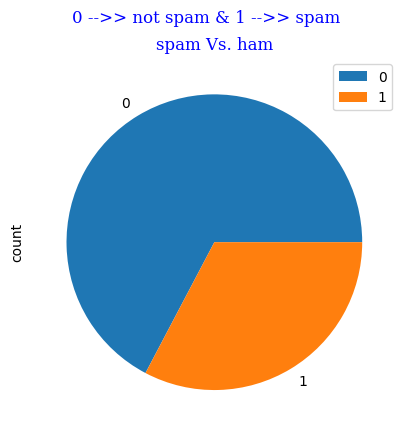

In [11]:
f = {"family": "serif", "color": "blue", "fontsize": 12}
data["CATEGORY"].value_counts().plot(kind="pie", legend=True)
plt.title("spam Vs. ham", fontdict=f)
plt.suptitle("0 -->> not spam & 1 -->> spam", fontdict=f)

plt.show()


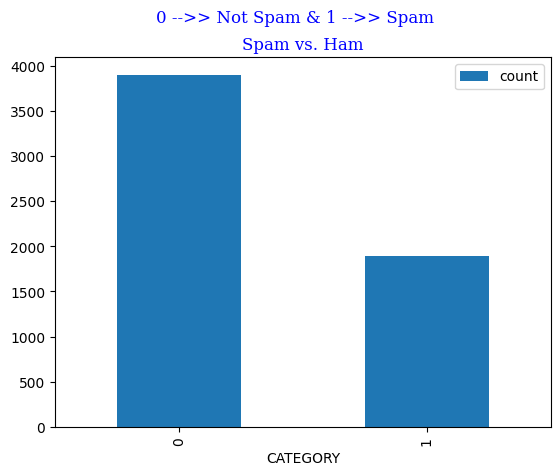

In [13]:
f = {"family": "serif", "color": "blue", "fontsize": 12}
data["CATEGORY"].value_counts().plot(kind="bar", legend=True)
plt.title("Spam vs. Ham", fontdict=f)
plt.suptitle("0 -->> Not Spam & 1 -->> Spam", fontdict=f)
plt.show()

In [14]:
data

,CATEGORY,MESSAGE
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ..."
1,1,ATTENTION: This is a MUST for ALL Computer Use...
2,1,This is a multi-part message in MIME format.\n...
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...
4,1,This is the bottom line. If you can GIVE AWAY...
...,...,...
5791,0,"I'm one of the 30,000 but it's not working ver..."
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\..."
5794,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w..."


In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [17]:
!pip install nltk
!python -m nltk.downloader wordnet

<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
stopword = nltk.corpus.stopwords.words('english')

In [21]:
lemmatizer=WordNetLemmatizer()
corpus=[]
for i in range(len(data)):
    review=re.sub('[^a-zA-Z0-9]',' ',data['MESSAGE'][i]) 
    review=review.lower()                                
    review=review.split()                                
    review=[lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]     
    review=' '.join(review)                                
    corpus.append(review)                                  

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2500,ngram_range=(1,3))
X=cv.fit_transform(corpus).toarray()

y=data['CATEGORY']

In [28]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [29]:
model1=linear_model.LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [30]:
y_predict=model1.predict(x_test)
y_predict[:15]

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [31]:
from sklearn import metrics
import sklearn
print(f"accuracy --->>> {metrics.accuracy_score(y_test,y_predict)*100:0.2f}%")
print(f"accuracy of errors --->>>{ 100-(metrics.accuracy_score(y_test,y_predict))*100:0.2f}%")
cm=metrics.confusion_matrix(y_test,y_predict)
tp,tn,fp,fn= cm[1,1],cm[0,0],cm[0,1],cm[1,0]
print("------------------------------------")
print("True positve prediction :",tp)
print("True Negative predicion :",tn)
print("False positve prediction:",fp)
print("False Negative prediction:",fn)
print("------------------------------------")
class_report = classification_report(y_test, y_predict)
print("Classification Report:\n", class_report)

accuracy --->>> 98.56%
accuracy of errors --->>>1.44%
------------------------------------
True positve prediction : 553
True Negative predicion : 1161
False positve prediction: 9
False Negative prediction: 16
------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1170
           1       0.98      0.97      0.98       569

    accuracy                           0.99      1739
   macro avg       0.99      0.98      0.98      1739
weighted avg       0.99      0.99      0.99      1739



In [32]:
print("index of each message with type it (spam or not spam )")

for i in range (len(data["MESSAGE"])):
    if data["CATEGORY"][i]!=0:
        print(f"{i} this message ----->>> spam\n ")
        print("_________________________________________")

    else:
        print(f"{i} this message ----->>>>  not spam ")
        print("___________________________________________")

index of each message with type it (spam or not spam )
0 this message ----->>> spam
 
_________________________________________
1 this message ----->>> spam
 
_________________________________________
2 this message ----->>> spam
 
_________________________________________
3 this message ----->>> spam
 
_________________________________________
4 this message ----->>> spam
 
_________________________________________
5 this message ----->>> spam
 
_________________________________________
6 this message ----->>> spam
 
_________________________________________
7 this message ----->>> spam
 
_________________________________________
8 this message ----->>> spam
 
_________________________________________
9 this message ----->>> spam
 
_________________________________________
10 this message ----->>> spam
 
_________________________________________
11 this message ----->>> spam
 
_________________________________________
12 this message ----->>> spam
 
___________________________________

In [33]:
from sklearn import svm

sm=svm.SVC(random_state=42,kernel="linear")
sm.fit(x_train,y_train)

SVC(kernel='linear', random_state=42)

In [34]:
y_pred=sm.predict(x_test)
y_pred[:10]

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1])

In [35]:
print(f"accuray={metrics.accuracy_score(y_test,y_pred)*100:0.2f}%")
print(f"accuracy of errors --->>>{ 100-(metrics.accuracy_score(y_test,y_predict))*100:0.5f}%")
print("-----------------------------------------------")
cm=metrics.confusion_matrix(y_test,y_predict)
tp,tn,fp,fn= cm[1,1],cm[0,0],cm[0,1],cm[1,0]

print("True positve prediction :",tp)
print("True Negative predicion :",tn)
print("False positve prediction:",fp)
print("False Negative prediction:",fn)
print("---------------------------------------")

report = classification_report(y_test, y_predict)
print("Classification Report:\n", report)

accuray=98.04%
accuracy of errors --->>>1.43761%
-----------------------------------------------
True positve prediction : 553
True Negative predicion : 1161
False positve prediction: 9
False Negative prediction: 16
---------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1170
           1       0.98      0.97      0.98       569

    accuracy                           0.99      1739
   macro avg       0.99      0.98      0.98      1739
weighted avg       0.99      0.99      0.99      1739

